<a href="https://colab.research.google.com/github/meetgandhi123/Deep-Learning-101/blob/master/Logistic_Regression_with_a_Neural_Network_mindset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import cv2
from PIL import Image
from scipy import ndimage
import keras

In [0]:
filename="/content/drive/My Drive/Deep Learning/Datasets/test_catvnoncat.h5"

with h5py.File(filename, 'r') as f:
   x_test = f['test_set_x']
   y_test=f['test_set_y']
   x_test=np.array(x_test)
   y_test=np.array(y_test)

In [0]:
filename1="/content/drive/My Drive/Deep Learning/Datasets/train_catvnoncat.h5"
with h5py.File(filename1, 'r') as f:
   x_train = f['train_set_x']
   y_train=f['train_set_y']
   x_train=np.array(x_train)
   y_train=np.array(y_train)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0  11506      0 --:--:-- --:--:-- --:--:-- 11482


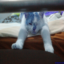

In [15]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
one=x_train[29]
cv2_imshow(one)

In [0]:
x_test=x_test/255
x_train=x_train/255

In [17]:
x_train.shape
x_train=x_train.reshape(209,12288)
x_test.shape
x_test=x_test.reshape(50,12288)
print(x_train.shape)
print(y_train)

(209, 12288)
[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [22]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8192, input_dim=(12288), activation='sigmoid'))
model.add(Dense(4096, activation='sigmoid'))
model.add(Dense(2048, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 8192)              100671488 
_________________________________________________________________
dense_30 (Dense)             (None, 4096)              33558528  
_________________________________________________________________
dense_31 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 128)              

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
209/209 [==============================] - 2s 11ms/step - loss: 0.6919 - accuracy: 0.6555
Epoch 2/20
209/209 [==============================] - 2s 9ms/step - loss: 0.6894 - accuracy: 0.6555
Epoch 3/20
209/209 [==============================] - 2s 10ms/step - loss: 0.6870 - accuracy: 0.6555
Epoch 4/20
209/209 [==============================] - 2s 10ms/step - loss: 0.6847 - accuracy: 0.6555
Epoch 5/20
209/209 [==============================] - 2s 9ms/step - loss: 0.6826 - accuracy: 0.6555
Epoch 6/20
209/209 [==============================] - 2s 9ms/step - loss: 0.6805 - accuracy: 0.6555
Epoch 7/20
209/209 [==============================] - 2s 10ms/step - loss: 0.6786 - accuracy: 0.6555
Epoch 8/20
209/209 [==============================] - 2s 9ms/step - loss: 0.6768 - accuracy: 0.6555
Epoch 9/20
209/209 [==============================] - 2s 9ms/step - loss: 0.6750 - accuracy: 0.6555
Epoch 10/20
209/209 [==============================] - 2s 10ms/step - loss: 0.6736 - accuracy: 0

In [21]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

50/50 [==============================] - 0s 868us/step
Accuracy: 34.00
